# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the colo r of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the con gruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED , BLUE . In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE , ORANGE . In each case, we measure the time it takes to name the ink colors in equallysized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

As a general note, be sure to keep a record of any resources that you use or refer to in the creation of your project. You will need to report your sources as part of the project submission.

### Question 1

What is our independent variable? What is our dependent variable?

Answer: In the Stroop task, our independent variable is consistency of color-word pairing while the dependent variable is response time.

### Question 2

What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices. Now it’s your chance to try out the Stroop task for yourself. Go to the following link, which has a Javabased applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download the following dataset which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

Link: https://faculty.washington.edu/chudler/java/ready.html

Dataset: https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view

Answer:

Appropriate set of hypotheses:

μ(Congruent): the population average for congruent word-color pairing

μ(Incongruent): the population average for incongruent word-color pairing

Null hypothesis(H0):  μ(Congruent) = μ(Incongruent), namely, the inconsistency of word-color pairing would not affect the response time

Alternative hypothesis(H1): μ(Congruent) != μ(Incongruent), namely, the inconsistency of word-color pairing would affect the response time

Because:
1. Two set of samples are paired: Both 'Congruent' and 'Incongruent' sets are from the same group of subjects, so the two sets have the same order and the same number of samples.
2. Two set of samples are related: the data are from the same group of subjects.
3. Two set of samples show normal distributions (ploted in question 4)

Thus, (two tailed) paired t-test should be performed in this case.

Reference: 
1. Types of T-Test: 
https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/types-of-t-tests/
2. Dependent and Independent Samples: 
https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/tests-of-means/how-are-dependent-and-independent-samples-different/
3. Prerequisite of Paired T-Test: https://wenku.baidu.com/view/eaf58f27ccbff121dd368352.html

### Question 3 

Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

Answer:

In [16]:
import pandas as pd
import matplotlib as plt
from tabulate import tabulate
from scipy.stats import iqr

data = pd.read_csv("stroopdata.csv")
d_cong = data['Congruent']
d_incong = data['Incongruent']

centr_cong = ['Congruent', d_cong.mean(), d_cong.median()]
centr_incong = ['Incongruent', d_incong.mean(), d_incong.median()]
var_cong = ['Congruent', d_cong.max() - d_cong.min(), iqr(d_cong), d_cong.std(ddof = 1)] #ddof = 1 for the sample std
var_incong = ['Incongruent', d_incong.max() - d_incong.min(), iqr(d_incong), d_incong.std(ddof = 1)]

print("Central Tendency：\n")
print(tabulate([centr_cong, centr_incong], headers=['Mean', 'Median'], tablefmt='orgtbl'))
print("\nVariability：\n")
print(tabulate([var_cong, var_incong], headers=['Range', 'IQR', 'Std.'], tablefmt='orgtbl'))

Central Tendency：

|             |    Mean |   Median |
|-------------+---------+----------|
| Congruent   | 14.0511 |  14.3565 |
| Incongruent | 22.0159 |  21.0175 |

Variability：

|             |   Range |     IQR |    Std. |
|-------------+---------+---------+---------|
| Congruent   |  13.698 | 4.3055  | 3.55936 |
| Incongruent |  19.568 | 5.33475 | 4.79706 |


### Question 4

Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

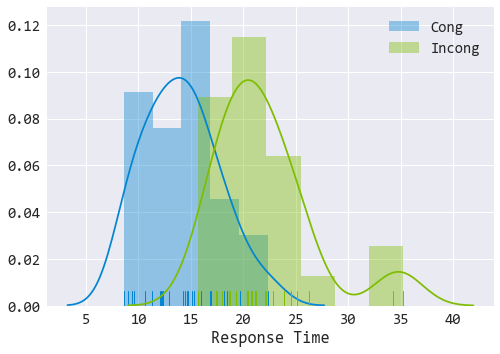

Stats From Question 3:

|             |    Mean |    Std. |
|-------------+---------+---------|
| Congruent   | 14.0511 | 3.55936 |
| Incongruent | 22.0159 | 4.79706 |


In [21]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(font_scale = 1.5, font = 'consolas')

sns.distplot(d_cong, color = 'xkcd:cerulean', rug = True, label='Cong')
sns.distplot(d_incong, color = 'xkcd:dark lime green', axlabel = 'Response Time', rug = True, label='Incong')

sns.plt.legend()
sns.plt.show()
print("Stats From Question 3:\n")
print(tabulate([['Congruent', d_cong.mean(), d_cong.std()], ['Incongruent', d_incong.mean(), d_incong.std()]], headers=['Mean', 'Std.'], tablefmt='orgtbl'))

Observed: 

Both 'Congruent' and 'Incongruent' show normal distribution, although their mean and standard deviation are different.

### Question 5

Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [20]:
import scipy

result = scipy.stats.ttest_rel(data['Congruent'], data['Incongruent'])
t_val = abs(result[0])
p_val = result[1]

print("\n't_critical value calculator: https://www.danielsoper.com/statcalc/calculator.aspx?id=10\n")
print("Alpha = 0.05 (two-tailed)\nDegree of Freedom = 23")
print("t_value = ", t_val, "\np_value = ", p_val)
print("t_critical = 2.0687 (calculated by the link above)")


't_critical value calculator: https://www.danielsoper.com/statcalc/calculator.aspx?id=10

Alpha = 0.05 (two-tailed)
Degree of Freedom = 23
t_value =  8.02070694411 
p_value =  4.10300058571e-08
t_critical = 2.0687 (calculated by the link above)


Answer:

t_critical = 2.0639, which is SMALLER than t_value = 6.5323. Meanwhile, p_value =  6.51016739044e-08  is far SMALLER than alpha = 0.05 (sum of probability in both two tails). Therefore, the t-test result has statistic significance, and the null hypothesis would be rejected. Thus we can conclude that the inconsistency of word-color pairing could render a longer response time.

Yes, the results match up with my expectations.

Reference: https://www.statsdirect.com/help/parametric_methods/paired_t.htm

### Question 6 

Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Answer:
    
The word processing is significantly faster than color processing in human brains. Thus, the word information has already been in the decision-making stage when the color information arrives, which could cause processing confusion. Alternatively, if subjects are required to report the meaning of words, the response time would not be affected by the incongruent colors (according to the reference below).

An alternative experiment of original Stroop task may be "Warped Words", where curved-shape words could also delay the response time.

Referece: https://en.wikipedia.org/wiki/Stroop_effect